#Scale Invariant Feature Transform

[paper](https://www.cs.ubc.ca/~lowe/papers/iccv99.pdf)

Το SIFT - Scale Invariant Feature Transform, είναι μια μέθοδος για την εξαγωγή διανυσμάτων χαρακτηριστικών (feature vectors) που περιγράφουν τοπικά χαρακτηριστικά μιας εικόνας τα οποία είναι αμετάβλητα στη μετατόπιση, στην κλιμάκωση, στην περιστροφή και τις διακυμάνσεις στον φωτισμό. 

Αυτοί οι περιγραφείς είναι χρήσιμοι για την αντιστοίχιση αντικειμένων μεταξύ εικόνων. 


Ο αλγόριθμος αποτελείται από τα ακόλουθα βήματα:

  1. *Scale-Space Extrema Detection*: κατασκευάζεται ένας χώρος κλίμακας αμετάβλητος στην κλιμάκωση όπου ανιχνεύονται οι ακρότατες τιμές (extreme points) της εικόνας,

  2. *Keypoint Localization*: επιλέγονται από τις ακρότατες τιμές οι τιμές που θα αποτελέσουν τα χαρακτηριστικά σημεία (feature points),

  3. *Orientation Assignment*: εντοπίζεται η θέση των χαρακτηριστικών σημείων στην εικόνα,  
  
  4. *Local Descriptor Creation*: παράγεται ο περιγραφέας χαρακτηριστικών σημείων. 


##Εύρεση ακρότατων τιμών στο χώρο κλίμακας (Scale-space extrema selection)
###Χώρος κλίμακας

Ο χώρος κλίμακας μιας εικόνας είναι μια συνάρτηση $L (x, y, σ)$ που παράγεται από την συνέλιξη της εικόνας με Gaussian πυρήνα $(G(x,y,σ)=\frac{1}{2πσ^2}e^-\frac{x^2+y^2}{2σ^2}$) σε διαφορετικές κλίμακες με την αρχική εικόνα. 

---
![](https://drive.google.com/uc?id=1VVrxze6NnNDYF0Fb0MPBRmM2qa5d0m7j)
---

Αρχικά, ο χώρος κλίμακας χωρίζεται σε οκτάβες όπου ο αριθμός των οκταβών και η κλίμακα εξαρτώνται από το μέγεθος της αρχικής εικόνας. 

Δημιουργούνται λοιπόν αρκετές οκτάβες της αρχικής εικόνας. Το μέγεθος της εικόνας κάθε οκτάβας είναι το ήμισυ του μεγέθος στην προηγούμενη οκτάβα.

Έπειτα, εξομαλύνεται κάθε οκτάβα σε όλες τις κλίμακες με χρήση του Gaussian πυρήνα.



###DOG (Difference of Gaussian)

Aπό αυτές τις εξομαλυμένες εικόνες δημιουργείται ένα άλλο σύνολο εικόνων το οποίο προκύπτει αφαιρώντας τις γειτονικές φιλτραρισμένες με Gaussian εικόνες μεταξύ τους. Έτσι προκύπτει η πυραμίδα διαφορών Gaussian (DoG).

![](https://drive.google.com/uc?id=1IV4OosbJRUpO7ThjSy61cYeeunYiclei)



##Εύρεση ακρότατων τιμών (extreme points)

Χρησιμοποιώντας τα DoG υπολογίζεται για κάθε ένα από αυτά την Laplacian of Gaussian (LoG) προσεγγίση, η οποία είναι και αμετάβλητη στις κλιμακώσεις (oι εικόνες που προκύπτουν από το DoG πολλαπλασιάζονται ήδη με το $σ^2$), δίνοντας ακόμη καλύτερα σημεία ενδιαφέροντος.

![](https://drive.google.com/uc?id=1Kp-VB1Cdw_qWBryZGcRp1wNEpV8nIi-q)

Κάθε εικονοστοιχείο της εικόνας συγκρίνεται με τους 8 γείτονές του, καθώς και με τα αντίστοιχα 9 εικονοστοιχεία στην επόμενη κλίμακα και 9 αντίστοιχα εικονοστοιχεία της προηγούμενης κλίμακας. Με αυτόν τον τρόπο, γίνονται συνολικά 26 έλεγχοι. 
Εάν αυτό το εικονοστοιχείο που ελέγχεται είναι ένα τοπικό ακρότατο,τότε θεωρείται ως πιθανό χαρακτηριστικό σημείο, το οποίο αντιπροσωπεύεται καλύτερα στην κλίμακα που ανιχνεύθηκε.


##2. Εντοπισμός χαρακτηριστικών σημείων (Keypoint Localization)

Αφού έχουν βρεθεί τα ακρότατα σημεία (extreme points), θα εντοπιστούν αυτά που είναι χρήσιμα. Τα τοπικά ελάχιστα και οι ακμές αφαιρούνται και κρατιώνται όσα σημεία έχουν τιμές μεγαλύτερες από το κατώφλι (στο paper προτείνεται η τιμή 0.03) .

Η προσέγγιση που ακολουθείται είναι παρόμοια με αυτήν που χρησιμοποιείται στον ανιχνευτή γωνιών Harris  (χρησιμοποιείται ένας 2x2 Hessian matrix (H) για να υπολογιστεί η κύρια καμπυλότητα). Με τη βοήθεια του κατωφλίου, η μετρική $r$ (orientation) εντοπίζει τα σημεία που θα θεωρηθούν ως τα χαρακτηριστικά σημεία της εικόνας.

![](https://drive.google.com/uc?id=1xTeFktTLR_xwubQczjHhvLJb3ZEpBkFz)




## 3. Ανάθεση προσανατολισμού (Orientation Assignment)

Για κάθε χαρακτηριστικό σημείο γνωρίζουμε ήδη την κλίμακα στην οποία εντοπίστηκε καθώς και ότι είναι αναλλοίωτη. Οπότε πρέπει να αντιστοιχηθεί το κάθε χαρακτηριστικό σημείο με έναν προσανατολισμό έτσι ώστε να είναι αναλλοίωτο το χαρακτηριστικό σημείο και ως προς την περιστροφή. 

![](https://drive.google.com/uc?id=12uXpzzECETQbXipKs-HwcMRaA0RblvXH)


Για να το πετύχουμε αυτό, αρχικά, λαμβάνεται μια γειτονιά γύρω από την τοποθεσία του χαρακτηριστικού σημείου ανάλογα με την κλίμακα και το μέγεθος κλίσης (περιοχή συλλογής προσανατολισμού) και έπειτα υπολογίζεται η κατεύθυνση του χαρακτηριστικού σημείου. Γιαυτό το λόγο δημιουργείται ένα ιστόγραμμα προσανατολισμού με 36 bins (που καλύπτουν τις 360$^ο$).

![](https://drive.google.com/uc?id=1MZt9PYPjplWpRHGMYy1FZdP9amcGe5Zx)

Ας υποθέσουμε ότι η κατεύθυνση κλίσης σε ένα συγκεκριμένο σημείο στην περιοχή συλλογής προσανατολισμού είναι 17$^ο$, τότε θα πάει στον κάδο 10$^ο$-19$^ο$ και το «ποσό» που προστίθεται στον κάδο είναι ανάλογο με το μέγεθος της κλίσης σε αυτό το σημείο. 

Έπειτα λαμβάνεται η υψηλότερη κορυφή στο ιστόγραμμα καθώς και οποιαδήποτε κορυφή πάνω από το 80% που θεωρείται επίσης ότι υπολογίζει τον προσανατολισμό.

Η διαδικασία αυτή παράγει χαρακτηριστικά σημεία με την ίδια μετατόπιση και κλίμακα αλλά με διαφορετικές κατευθύνσεις, συμβάλλοντας στη σταθερότητα του ταιριάσματος των χαρακτηριστικών.

## 4. Περιγραφείς χαρακτηριστικών σημείων

Στόχος τώρα είναι να δημιουργήσουμε έναν περιγραφέα, για την τοπική περιοχή της εικόνας, σχετικός με το κάθε χαρακτηριστικό σημείο, που να είναι διακριτικός και αμετάβλητος σε επιπλέον διακυμάνσεις όπως σε αλλαγές γωνίας λήψης και αλλαγές φωτισμού.

![](https://drive.google.com/uc?id=1jTnfF6io01QBQU1A22Egd8bouMb100V8)

Αρχικά λαμβάνεται ένα παράθυρο μεγέθος 16x16 γύρω από το χαρακτηριστικό σημείο και διαιρείται σε 16 υποπεριοχές μεγέθους 4x4. Για κάθε υποπεριοχή, δημιουργούνται ιστογράμματα κατεύθυνσης με 8 bin.

![](https://drive.google.com/uc?id=1qhozfNGbezCv7cEMZNoZAQzodyvnFOED)

Οπότε για ένα παράθυρο 16x16 γύρω από το χαρακτηριστικό σημείο παράγεται ένας  περιγραφέας που περιέχει 128 τιμές (4 X 4 X 8 bin=128 bin) ο οποίος στη συνέχεια ομαλοποιείται (κάθε προσανατολισμός κλίσης σχετίζεται με το προσανατολισμό του σημείου ενδιαφέροντος) και κατωφλιοποιείται ώστε να είναι αναλλοίωτος σε μικρές αλλαγές φωτισμού.



In [ ]:
# Important to include it for sift
%pip install opencv-python#==3.4.2.17
%pip install opencv-contrib-python#==3.4.2.17

     |████████████████████████████████| 25.0MB 1.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 159kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Κατεβάστε τις εικόνες για το πείραμα [eiffel_1.jpg](https://drive.google.com/file/d/1b6Lq8nnfp2PU1Obh3LkWNaqbx6jC66NP) & [eiffel_2.jpg](https://drive.google.com/file/d/1pStLmJYJ0rHm5GAf8BvGtR_w5LikwmfF)

In [ ]:
# Load the image
image1 = cv2.imread('eiffel_1.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)


# Load the image
image2 = cv2.imread('eiffel_2.jpg')

# Convert the training image to RGB
test_image = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)

# Convert the training image to gray scale
test_gray= cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)

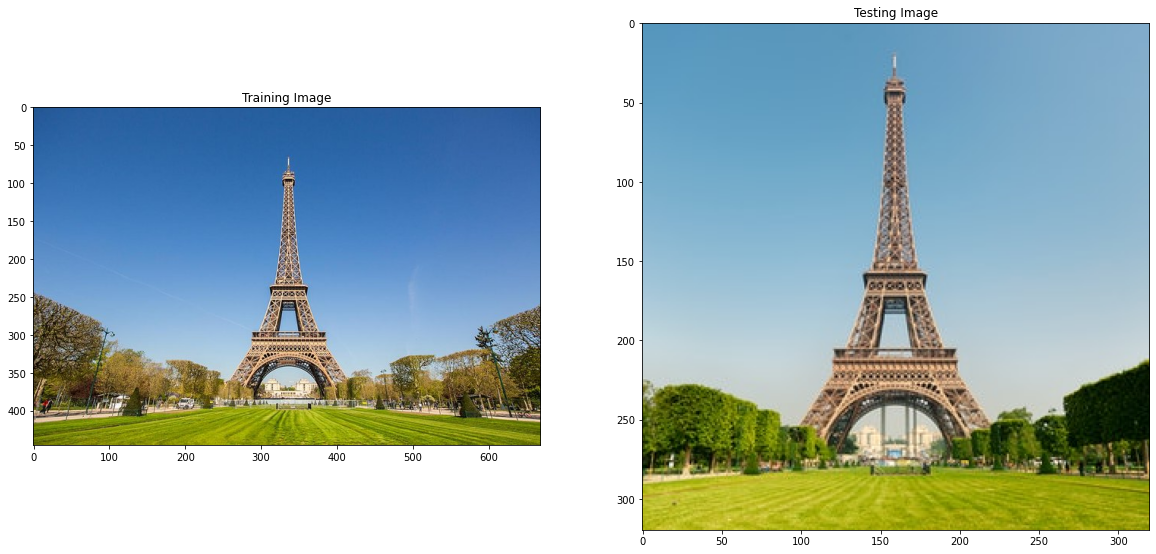

In [ ]:
# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)


In [ ]:
#sift
sift = cv2.xfeatures2d.SIFT_create()

## Detect keypoints and Create Descriptor

keypoints_1, descriptors_1 = sift.detectAndCompute(training_image,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(test_image,None)

print("# keypoints_1: {}, descriptors_1: {}".format(len(keypoints_1), descriptors_1.shape))
print("image 1 size", image1.shape)
print("#  keypoints_2: {}, descriptors_2: {}".format(len(keypoints_2), descriptors_2.shape))
print("image 2 size", image2.shape)

# keypoints_1: 1009, descriptors_1: (1009, 128)
image 1 size (446, 669, 3)
#  keypoints_2: 369, descriptors_2: (369, 128)
image 2 size (320, 320, 3)


In [ ]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(training_image, keypoints_1, test_image, keypoints_2, matches[:300], test_image, flags=2)


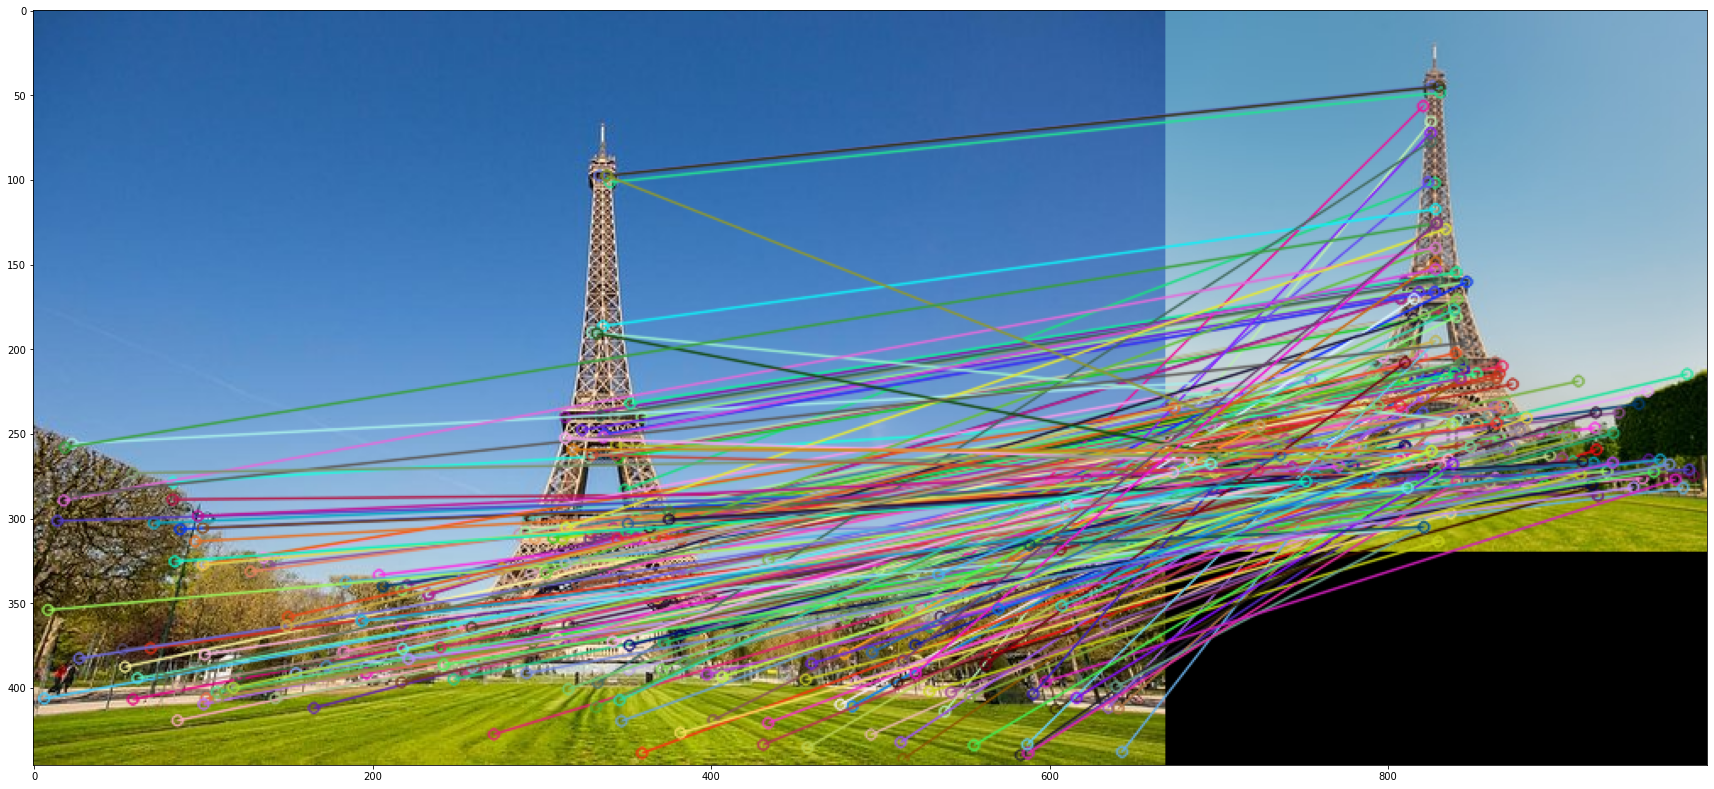

In [ ]:
plt.figure(figsize=(30, 20))
plt.imshow(img3)